
# Задачі кластеризації та класифікації


<h2>Мета</h2>

Ознайомитись з різновидами моделей для задач кластеризації та класифікації, а також методами побудови та оцінки цих моделей. Після завершення цієї лабораторної роботи ви зможете:

* Використовувати прості моделі для задач кластеризації та класифікації
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Виконайте кластеризацію по ВВП на душу населення та щільності населення.
2. Використайте метод ліктя для підбору оптимальної кількості кластерів.
3. Визначіть, який регіон домінує в кожному з кластерів.
4. Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).
5. Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Виконайте кластеризацію по ВВП на душу населення та щільності населення. </p>
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Зчитую дані з файлу у датафрейм


In [2]:
df = pd.read_csv('clean_data_lab5.csv')
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660


Виділяю параметри для кластеризації

In [3]:
features = df[['GDP per capita', 'Population density']]
features.head()

,GDP per capita,Population density
0,561.778746,53.083405
1,4124.982390,100.038296
2,3916.881571,17.048902
3,11834.745230,277.995000
4,36988.622030,164.427660


Будую модель методом k середніх з кількістю кластерів 5

In [4]:
kmeans1 = KMeans(
    init='random',
    n_clusters=5,
    n_init=10,
    max_iter=300
)

kmeans1.fit(features)

D:\anaconda_jup\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=5, n_init=10)

<p>Отримані центри кластерів:</p>


In [5]:
kmeans1.cluster_centers_

array([[ 7146.84427437,   162.90056916],
       [67295.539927  ,  2910.46212014],
       [15029.51580863,   646.48221162],
       [38169.7613684 ,   463.62384187],
       [ 2014.33375108,   130.85103865]])

<p>Масив із номерами кластерів для кожного рядка даних:</p>


In [6]:
kmeans1.labels_

array([4, 4, 4, 2, 3, 4, 2, 2, 4, 2, 3, 3, 4, 3, 2, 4, 2, 0, 3, 0, 4, 2,
       4, 4, 0, 0, 0, 2, 3, 0, 4, 4, 4, 4, 4, 3, 2, 4, 4, 2, 2, 0, 0, 4,
       4, 4, 2, 4, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 4, 4, 0, 2, 2, 4, 2, 0,
       3, 3, 2, 0, 4, 4, 3, 4, 2, 2, 2, 0, 3, 4, 4, 4, 4, 4, 4, 3, 2, 1,
       4, 4, 0, 0, 1, 2, 3, 3, 0, 3, 4, 0, 4, 4, 2, 3, 4, 3, 4, 4, 2, 0,
       4, 4, 2, 2, 2, 1, 1, 0, 4, 4, 0, 0, 4, 2, 4, 4, 0, 0, 4, 4, 2, 4,
       0, 4, 4, 4, 4, 0, 4, 3, 2, 3, 4, 2, 4, 2, 1, 2, 4, 2, 2, 4, 4, 0,
       4, 2, 2, 3, 1, 0, 0, 4, 4, 3, 4, 2, 4, 0, 2, 4, 1, 2, 2, 2, 4, 4,
       0, 2, 3, 4, 2, 0, 2, 0, 4, 0, 4, 3, 1, 2, 4, 4, 0, 4, 4, 4, 2, 4,
       0, 0, 2, 4, 4, 4, 3, 3, 1, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4])

<p>Візуалізую отримані кластери:</p>


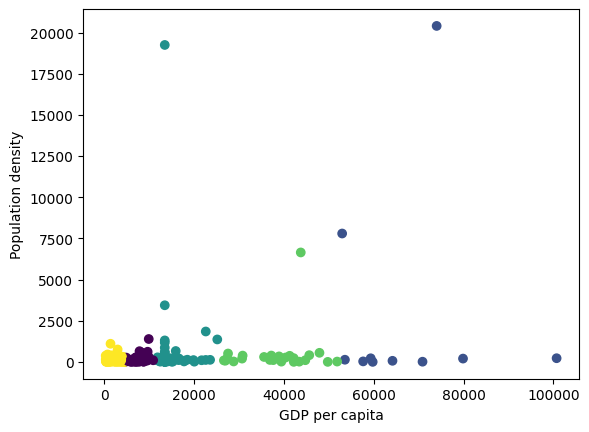

In [7]:
plt.xlabel('GDP per capita')
plt.ylabel('Population density')
plt.scatter(df[['GDP per capita']], df[['Population density']], c=kmeans1.labels_)
plt.show()

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Використайте метод ліктя для підбору оптимальної кількості кластерів.</p>
</div>


Визначаю оптимальну кількість кластерів. Скористаюсь методом "ліктя". Для цього ініціалізую алгоритм k середніх кількістю кластерів від 1 до 10 і для кожної моделі рахую суму квадратів похибок (евклідових відстаней точок кластерів від відповідних центрів):

In [8]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

sse = []
max_kernels = 10

for k in range(1, max_kernels + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

D:\anaconda_jup\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda_jup\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda_jup\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda_jup\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

<p>Візуалізую отримані результати:</p>


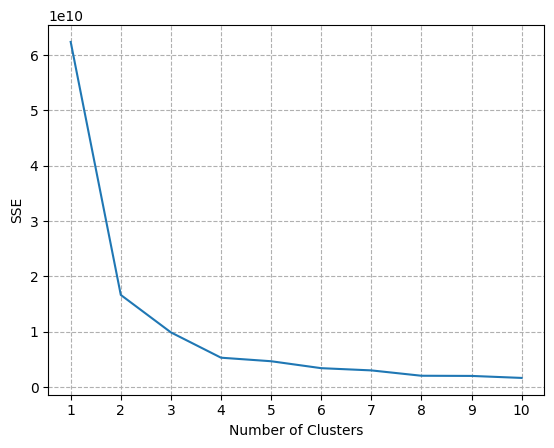

In [9]:
plt.plot(range(1, max_kernels + 1), sse)
plt.xticks(range(1, max_kernels + 1))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(linestyle='--')
plt.show()

<p>Оптимальна кількість кластерів дорівнює 4 </p>
<p>Візуалізую для оптимальної кількості кластерів:</p>

D:\anaconda_jup\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


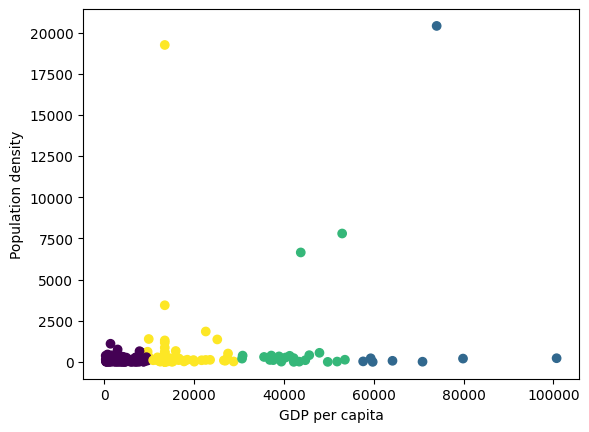

In [10]:
kmeans = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300
)

kmeans.fit(features)

plt.xlabel('GDP per capita')
plt.ylabel('Population density')
plt.scatter(df[['GDP per capita']], df[['Population density']], c=kmeans.labels_)
plt.show()

<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Визначіть, який регіон домінує в кожному з кластерів.</p>
</div>


Додаю мітки кластерів в датафрейм

In [11]:
df['Cluster'] = kmeans.labels_

Визначаю домінуючий регіон для кожного кластера

In [12]:
def dominant_region(cluster_df):
    region_counts = cluster_df['Region'].value_counts()
    dominant_region = region_counts.idxmax()
    return dominant_region

clustered_regions = df.groupby('Cluster')

dominant_regions = clustered_regions.apply(dominant_region)

for cluster, region in dominant_regions.items():
    print(f"Cluster {cluster}: Dominant region - {region}")

Cluster 0: Dominant region - Sub-Saharan Africa
Cluster 1: Dominant region - Europe & Central Asia
Cluster 2: Dominant region - Europe & Central Asia
Cluster 3: Dominant region - Latin America & Caribbean


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).</p>
</div>


 Обираю потрібні ознаки:


In [13]:
all_features=pd.get_dummies(df[['GDP per capita', 'Population', 'CO2 emission', 'Area']])

# класифікувати буду по регіону
all_features[['Region']] = df[['Region']]

all_features.head()

,GDP per capita,Population,CO2 emission,Area,Region
0,561.778746,34656032.0,9809.225000,652860,South Asia
1,4124.982390,2876101.0,5716.853000,28750,Europe & Central Asia
2,3916.881571,40606052.0,145400.217000,2381740,Middle East & North Africa
3,11834.745230,55599.0,165114.116337,200,East Asia & Pacific
4,36988.622030,77281.0,462.042000,470,Europe & Central Asia


 Розділяю датасет на навчальну і тестову вибірки за допомогою функції <code>train_test_split()</code>:


In [14]:
from sklearn.model_selection import train_test_split,  cross_val_score

df_train, df_test = train_test_split(
    all_features,
    test_size=0.2,
    random_state=1
)
df_train.head()

,GDP per capita,Population,CO2 emission,Area,Region
117,5237.147670,2081206.0,7510.016,25710,Europe & Central Asia
47,1534.973724,23695919.0,11045.004,322460,Sub-Saharan Africa
27,13445.593416,30661.0,179.683,150,Latin America & Caribbean
59,4223.584579,6344722.0,6285.238,21040,Latin America & Caribbean
40,13792.926050,17909754.0,82562.505,756096,Latin America & Caribbean


<p>Розміщую цільові дані - Region -  в окремому датафреймі:</p>

In [15]:
x_train = df_train[['GDP per capita', 'Population', 'CO2 emission', 'Area']]
y_train = df_train[['Region']]

x_test = df_test[['GDP per capita', 'Population', 'CO2 emission', 'Area']]
y_test = df_test[['Region']]

<h3>Навчання та тестування моделей:</h3>

Для навчання були обрані наступні методи:

- K-nearest neighbors
- Support vector machines
- Decision Tree Classifier
- Random Forest
- GaussianNB

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

 <h3>K-nearest neighbors</h3>


Будую модель


In [17]:
KNN_model = KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train, y_train)

D:\anaconda_jup\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

Оцінюю точність

In [18]:
predicted = KNN_model.predict(x_test)
KNN_model.score(x_test, y_test)

0.20454545454545456

Отримую звіт класифікації

In [19]:
print(classification_report(y_test, predicted))

                            precision    recall  f1-score   support

       East Asia & Pacific       0.25      0.22      0.24         9
     Europe & Central Asia       0.18      0.21      0.19        14
 Latin America & Caribbean       0.00      0.00      0.00         8
Middle East & North Africa       0.00      0.00      0.00         3
             North America       0.00      0.00      0.00         1
                South Asia       0.00      0.00      0.00         1
        Sub-Saharan Africa       0.50      0.50      0.50         8

                  accuracy                           0.20        44
                 macro avg       0.13      0.13      0.13        44
              weighted avg       0.20      0.20      0.20        44



D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Попередження звертає увагу на те, що є деякі label, включені в y_test, які класифікатор жодного разу не класифікував

In [20]:
print(confusion_matrix(y_test,predicted))

[[2 3 2 0 0 0 2]
 [2 3 5 1 0 1 2]
 [4 4 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 4 0 0 0 0 4]]


Відобразимо візуалізацію для матриці невідповідностей

In [21]:
def show_confusion_matrix(matrix, title):
    ax = sns.heatmap(matrix, annot=True, cmap='Reds')
    ax.set_title(title)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

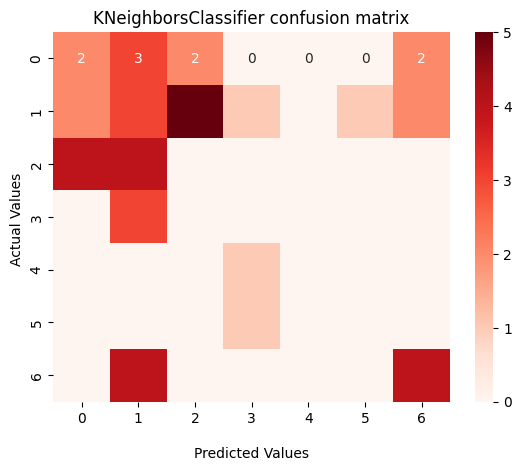

In [22]:
show_confusion_matrix(confusion_matrix(y_test, predicted), 'KNeighborsClassifier confusion matrix')

 <h3>Support vector machines</h3>


Будую модель


In [23]:
SVC_model = SVC()
SVC_model.fit(x_train, y_train.values.ravel())
predicted = SVC_model.predict(x_test)

Оцінюю точність

In [24]:
print('mean accuracy = ', SVC_model.score(x_test, y_test))

mean accuracy =  0.3181818181818182


Отримую звіт класифікації

In [25]:
print(classification_report(y_test, predicted))

                            precision    recall  f1-score   support

       East Asia & Pacific       0.00      0.00      0.00         9
     Europe & Central Asia       0.35      0.93      0.51        14
 Latin America & Caribbean       0.00      0.00      0.00         8
Middle East & North Africa       0.00      0.00      0.00         3
             North America       0.00      0.00      0.00         1
                South Asia       0.00      0.00      0.00         1
        Sub-Saharan Africa       0.14      0.12      0.13         8

                  accuracy                           0.32        44
                 macro avg       0.07      0.15      0.09        44
              weighted avg       0.14      0.32      0.19        44



D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Попередження звертає увагу на те, що є деякі label, включені в y_test, які класифікатор жодного разу не класифікував

In [26]:
print(confusion_matrix(y_test,predicted))

[[ 0  6  0  0  0  0  3]
 [ 0 13  0  0  0  0  1]
 [ 0  7  0  0  0  0  1]
 [ 0  2  0  0  0  0  1]
 [ 0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  7  0  0  0  0  1]]


Відобразимо візуалізацію для матриці невідповідностей

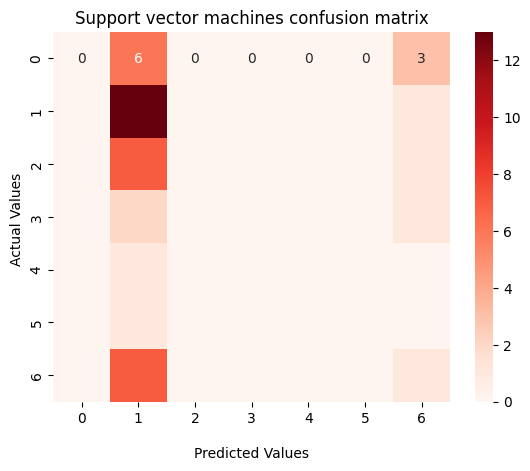

In [27]:
show_confusion_matrix(confusion_matrix(y_test, predicted), 'Support vector machines confusion matrix')

 <h3>Decision Tree Classifier</h3>


Будую модель


In [28]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
decision_tree.fit(x_train, y_train)
predicted = decision_tree.predict(x_test)

Оцінюю точність

In [29]:
decision_tree.score(x_test, y_test)

0.5227272727272727

Отримую звіт класифікації

In [30]:
print(classification_report(y_test, predicted))

                            precision    recall  f1-score   support

       East Asia & Pacific       0.50      0.11      0.18         9
     Europe & Central Asia       0.62      0.57      0.59        14
 Latin America & Caribbean       0.35      0.88      0.50         8
Middle East & North Africa       0.00      0.00      0.00         3
             North America       0.00      0.00      0.00         1
                South Asia       0.00      0.00      0.00         1
        Sub-Saharan Africa       0.78      0.88      0.82         8

                  accuracy                           0.52        44
                 macro avg       0.32      0.35      0.30        44
              weighted avg       0.50      0.52      0.47        44



D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Попередження звертає увагу на те, що є деякі label, включені в y_test, які класифікатор жодного разу не класифікував

In [31]:
print(confusion_matrix(y_test,predicted))

[[1 3 4 0 0 0 1]
 [0 8 6 0 0 0 0]
 [1 0 7 0 0 0 0]
 [0 1 2 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 1 0 0 0 7]]


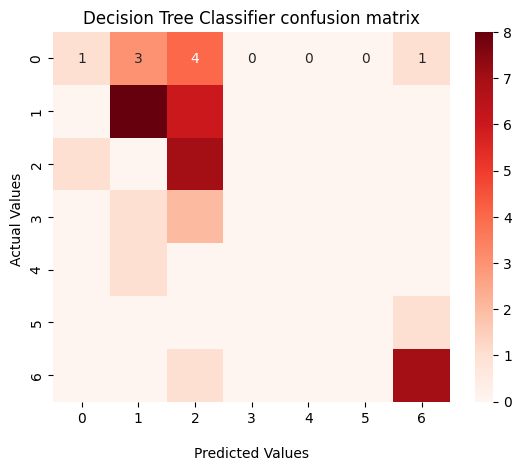

In [32]:
show_confusion_matrix(confusion_matrix(y_test, predicted), 'Decision Tree Classifier confusion matrix')

 <h3>Random Forest Classifier</h3>


Будую модель


In [33]:
randomforest = RandomForestClassifier(max_depth=5)
randomforest.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=5)

Оцінюю точність

In [34]:
predicted = randomforest.predict(x_test)
randomforest.score(x_test, y_test)

0.5227272727272727

Отримую звіт класифікації

In [35]:
print(classification_report(y_test, predicted))

                            precision    recall  f1-score   support

       East Asia & Pacific       0.67      0.22      0.33         9
     Europe & Central Asia       0.53      0.57      0.55        14
 Latin America & Caribbean       0.43      0.75      0.55         8
Middle East & North Africa       0.00      0.00      0.00         3
             North America       0.00      0.00      0.00         1
                South Asia       0.00      0.00      0.00         1
        Sub-Saharan Africa       0.70      0.88      0.78         8

                  accuracy                           0.52        44
                 macro avg       0.33      0.35      0.32        44
              weighted avg       0.51      0.52      0.48        44



D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Попередження звертає увагу на те, що є деякі label, включені в y_test, які класифікатор жодного разу не класифікував

In [36]:
print(confusion_matrix(y_test,predicted))

[[2 3 1 1 0 0 2]
 [0 8 5 1 0 0 0]
 [1 1 6 0 0 0 0]
 [0 2 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 1 0 0 0 7]]


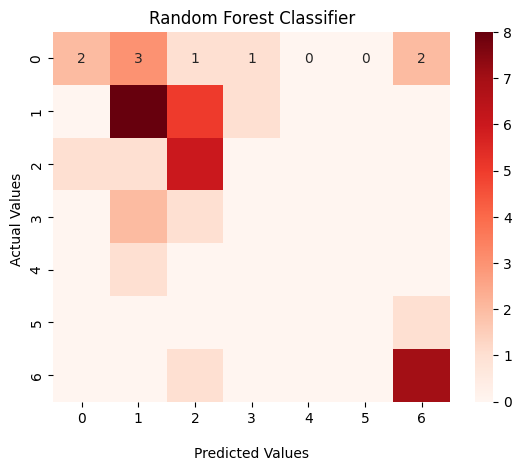

In [37]:
show_confusion_matrix(confusion_matrix(y_test, predicted), 'Random Forest Classifier')

 <h3>GaussianNB</h3>


Будую модель


In [38]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train.values.ravel())

GaussianNB()

Оцінюю точність

In [39]:
predicted = naive_bayes.predict(x_test)
naive_bayes.score(x_test, y_test)

0.45454545454545453

Отримую звіт класифікації

In [40]:
print(classification_report(y_test, predicted))

                            precision    recall  f1-score   support

       East Asia & Pacific       0.50      0.11      0.18         9
     Europe & Central Asia       0.58      0.79      0.67        14
 Latin America & Caribbean       0.00      0.00      0.00         8
Middle East & North Africa       0.00      0.00      0.00         3
             North America       0.50      1.00      0.67         1
                South Asia       0.00      0.00      0.00         1
        Sub-Saharan Africa       0.35      0.88      0.50         8

                  accuracy                           0.45        44
                 macro avg       0.28      0.40      0.29        44
              weighted avg       0.36      0.45      0.36        44



D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda_jup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Попередження звертає увагу на те, що є деякі label, включені в y_test, які класифікатор жодного разу не класифікував

In [41]:
print(confusion_matrix(y_test,predicted))

[[ 1  3  0  0  0  0  5]
 [ 0 11  0  0  1  0  2]
 [ 1  4  0  0  0  0  3]
 [ 0  1  0  0  0  0  2]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  0  1  0  0  0  7]]


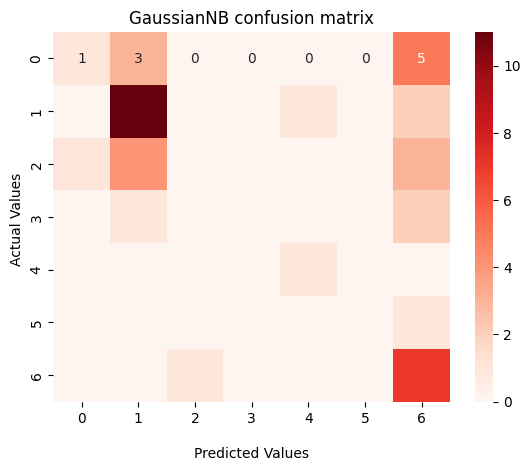

In [42]:
show_confusion_matrix(confusion_matrix(y_test, predicted), 'GaussianNB confusion matrix')

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.</p>
</div>


<p>Визначення опитамального значення параметра k методу k найближчих сусідів </p>
<p>Для цього ініціалізую алгоритм з параметром від 1 до 20 і для кожної моделі визначу точність з допомогою метрики accuracy:</p>

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
k_values = range(1, 20)
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train.values.ravel())
    
    test_pred = knn.predict(x_test)
    test_accuracy.append(accuracy_score(y_test, test_pred))

 Отримані показники якості візуалізую на графіку:


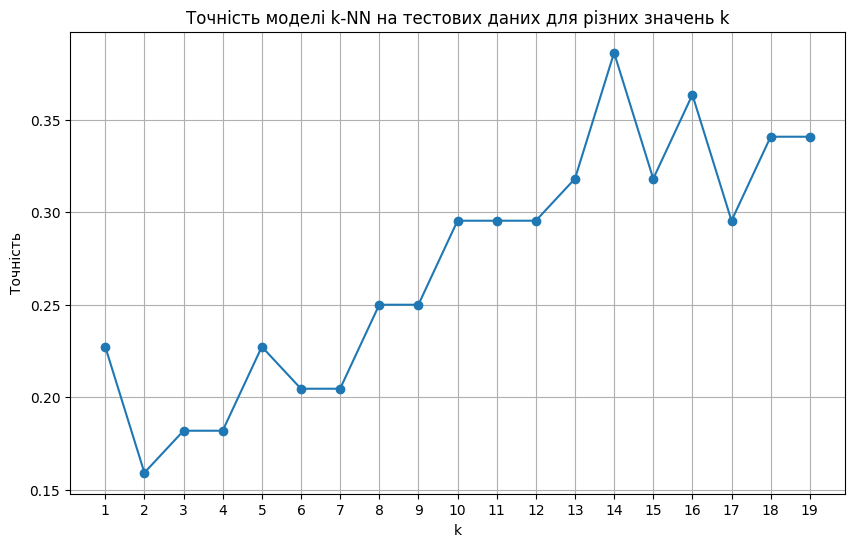

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracy, marker='o')
plt.title('Точність моделі k-NN на тестових даних для різних значень k')
plt.xlabel('k')
plt.ylabel('Точність')
plt.xticks(k_values)
plt.grid(True)
plt.show()

З графіку бачу, що найкраще значення параметра k = 14, адже при цьому модель показує найвищу точність


<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Використовуючи файл <a href="https://drive.google.com/file/d/1gxqzPQNlqrwrJI3zstMsvHQAbsdMPe-2/view?usp=drive_link" target="_blank">Data5.csv</a>:

1. Визначити кластер країн з найкращим розвитком (кластеризувати по Ie, Iec, Is; для k-середніх використати 4 кластера). Побудувати центри кластерів.
2. Провести кластеризацію по Сql, порахувати скільки країн потрапило в різні кластери, якщо порівнювати з п1.</p>
</div>


Згідно з методологією вимірювання сталого розвитку країн, сталий розвиток оцінюється за допомогою відповідного індексу у просторі трьох вимірів: економічного (Іес), екологічного (Іе) і соціально-інституціонального (Is). Цей індекс є вектором, норма якого визначає рівень сталого розвитку, а його просторове положення в системі координат (Iec,Ie,Is) характеризує міру «гармонійності» цього розвитку.

# 1. Визначити кластер країн з найкращим розвитком (кластеризувати по Ie, Iec, Is; для k-середніх використати 4 кластера). Побудувати центри кластерів.

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Зчитуємо заданий набір даних, зразу коригуючи
df = pd.read_csv(
    'Data5.csv', encoding='windows-1251', sep=';', decimal=','
).rename(columns={'Unnamed: 0': 'Country'})

df

```

</details>



In [46]:
df = pd.read_csv( 'Data5.csv', encoding='windows-1251', sep=';', decimal=',').rename(columns={'Unnamed: 0': 'Country'})
df.head()

,Country,ISO,UA,Cql,Ie,Iec,Is
0,Albania,ALB,Албанія,0.973924,0.605348,0.538673,0.510113
1,Algeria,DZA,Алжир,0.782134,0.587219,0.348159,0.497986
2,Angola,AGO,Ангола,0.372344,0.274394,0.332117,0.346907
3,Argentina,ARG,Аргентина,0.883830,0.699685,0.281995,0.518820
4,Armenia,ARM,Вірменія,1.016499,0.718327,0.535648,0.486498


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  132 non-null    object 
 1   ISO      132 non-null    object 
 2   UA       132 non-null    object 
 3   Cql      132 non-null    float64
 4   Ie       132 non-null    float64
 5   Iec      132 non-null    float64
 6   Is       132 non-null    float64
dtypes: float64(4), object(3)
memory usage: 7.3+ KB


Виділимо ознаки, по яким будемо кластеризувати дані:

In [48]:
features = df[['Ie', 'Iec', 'Is']]

Ініціалізуємо алгоритм k середніх (кількість кластерів - 4)

In [49]:
kmeans = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300
)

kmeans.fit(features)

D:\anaconda_jup\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=4, n_init=10)

Візуалізуємо:

In [50]:
cluster_centers = kmeans.cluster_centers_
best_cluster_index = cluster_centers.sum(axis=1).argmax()
best_cluster_center = cluster_centers[best_cluster_index]

C:\Users\Користувач\AppData\Local\Temp\ipykernel_24560\3708017524.py:6: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(features['Ie'], features['Iec'], features['Is'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
C:\Users\Користувач\AppData\Local\Temp\ipykernel_24560\3708017524.py:10: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(center[0], center[1], center[2], c='red', marker='o', s=100, label='Центр кластеру')
C:\Users\Користувач\AppData\Local\Temp\ipykernel_24560\3708017524.py:12: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(center[0]

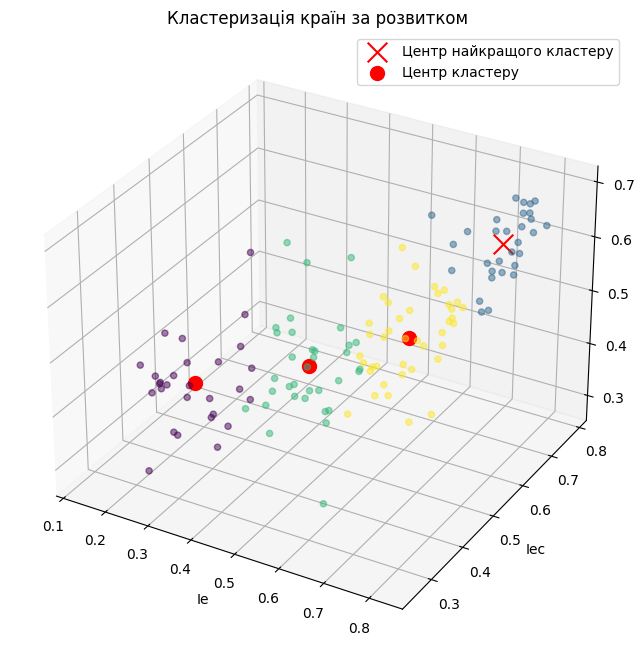

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(features['Ie'], features['Iec'], features['Is'], c=kmeans.labels_, cmap='viridis', alpha=0.5)

for center in kmeans.cluster_centers_:
    if not np.array_equal(center, best_cluster_center):
        ax.scatter(center[0], center[1], center[2], c='red', marker='o', s=100, label='Центр кластеру')
    else:
        ax.scatter(center[0], center[1], center[2], c='red', marker='x', s=200, label='Центр найкращого кластеру')

ax.set_xlabel('Іе')
ax.set_ylabel('Іec')
ax.set_zlabel('Іs')
ax.set_title('Кластеризація країн за розвитком')
ax.legend()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:3], labels[1:3])

plt.show()

# 2. Провести кластеризацію по Сql, порахувати скільки країн потрапило в різні кластери, якщо порівнювати з п1

In [52]:
features = df[['Cql']]
kmeans1 = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300
)

kmeans1.fit(features)

D:\anaconda_jup\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=4, n_init=10)

In [53]:
cluster_counts_features = pd.Series(kmeans.labels_).value_counts().sort_index()
num_clusters_features = len(cluster_counts_features)
print("Кількість кластерів (за колонками 'Ie', 'Iec', 'Is'): ", num_clusters_features)
print("Кількість країн у кожному кластері (за колонками 'Ie', 'Iec', 'Is'):")
print(cluster_counts_features)

cluster_counts_Cql = pd.Series(kmeans1.labels_).value_counts().sort_index()
num_clusters_Cql = len(cluster_counts_Cql)
print("\nКількість кластерів (за колонкою 'Cql'): ", num_clusters_Cql)
print("Кількість країн у кожному кластері (за колонкою 'Cql'):")
print(cluster_counts_Cql)

difference_sum = (cluster_counts_features - cluster_counts_Cql).abs().sum()
print("Сума різниць кількості країн у кожному кластері для двох наборів даних:", difference_sum)

Кількість кластерів (за колонками 'Ie', 'Iec', 'Is'):  4
Кількість країн у кожному кластері (за колонками 'Ie', 'Iec', 'Is'):
0    28
1    30
2    34
3    40
Name: count, dtype: int64

Кількість кластерів (за колонкою 'Cql'):  4
Кількість країн у кожному кластері (за колонкою 'Cql'):
0    40
1    28
2    29
3    35
Name: count, dtype: int64
Сума різниць кількості країн у кожному кластері для двох наборів даних: 24


<h2>Виконав студент групи ІП-21 <br> Пізнак Роман</h2>
